# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [1]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [2]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [3]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-11 14:20:11][INFO] 2025-01-11 14:20:11.337015
[01-11 14:20:11][INFO] 2025-01-11 14:20:11.403063
[01-11 14:20:11][INFO] Se ajustarán 2 parámetros.
[01-11 14:20:11][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-11 14:20:11][INFO] Se ajustarán 2 parámetros.
[01-11 14:20:11][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


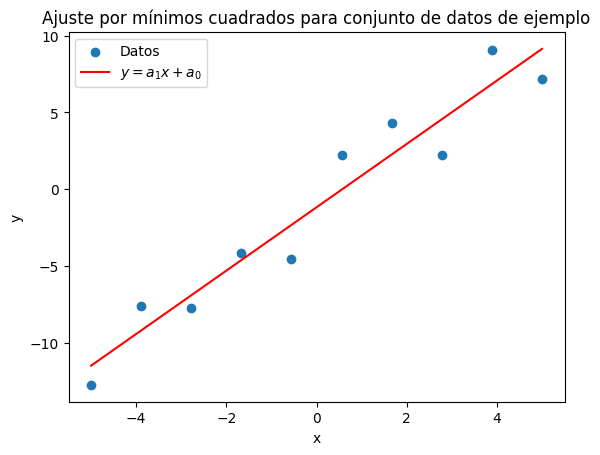

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [5]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

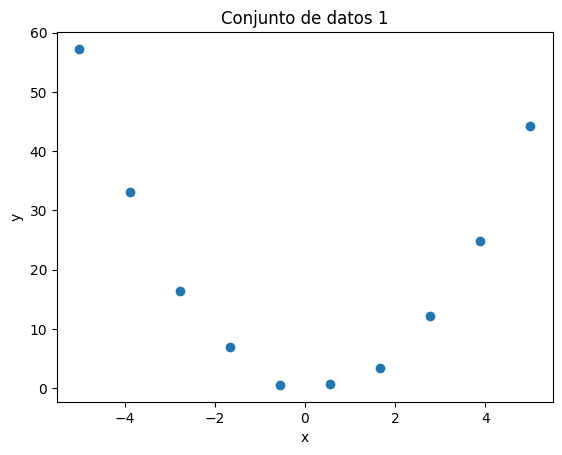

In [6]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática. 

In [7]:
def der_parcial_C2(xs: list, ys: list) -> tuple[float, float, float]:
    c_2 = sum(x**4 for x in xs)  
    c_1 = sum(x**3 for x in xs)  
    c_0 = sum(x**2 for x in xs)  
    c_ind = sum(ys * x**2 for x, ys in zip(xs, ys)) 
    return (c_2, c_1, c_0, c_ind)

def der_parcial_C1(xs: list, ys: list) -> tuple[float, float, float]:
    c_2 = sum(x**3 for x in xs) 
    c_1 = sum(x**2 for x in xs)  
    c_0 = sum(x for x in xs)
    c_ind = sum(ys * x for x, ys in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_C0(xs: list, ys: list) -> tuple[float, float, float]:
    c_2 = sum(x**2 for x in xs) 
    c_1 = sum(x for x in xs)  
    c_0 = len(xs)  
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

def ajustar_min_cuadrados_cuadratica(xs: list, ys: list) -> list[float]:
    gradientes = [der_parcial_C2, der_parcial_C1, der_parcial_C0]
    return ajustar_min_cuadrados(xs, ys, gradientes)
def cuadratica(x, params):
    a, b, c = params
    return a * x**2 + b * x + c



[01-11 14:24:18][INFO] Se ajustarán 3 parámetros.
[01-11 14:24:18][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-11 14:24:18][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[np.float64(2.024410482925083), np.float64(-1.123325129575543), np.float64(-0.6382556172537739)]


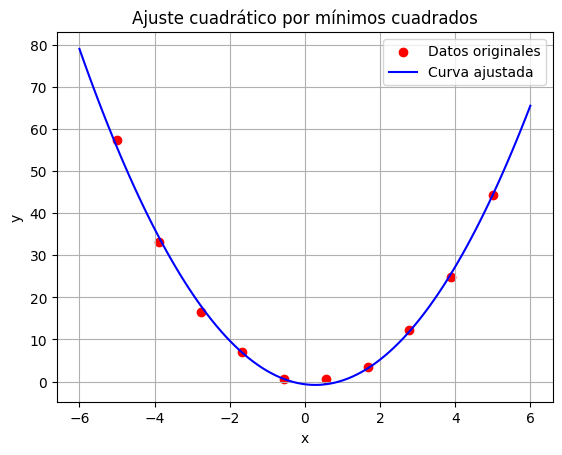

In [24]:
params = ajustar_min_cuadrados_cuadratica(xs1, ys1)
print(params)
x_range = np.linspace(min(xs1) - 1, max(xs1) + 1, 100)
y_range = [cuadratica(x, params) for x in x_range]

plt.scatter(xs1, ys1, color='red', label='Datos originales')  
plt.plot(x_range, y_range, color='blue', label='Curva ajustada') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste cuadrático por mínimos cuadrados')
plt.grid(True)
plt.show()

## Conjunto de datos 2

In [15]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

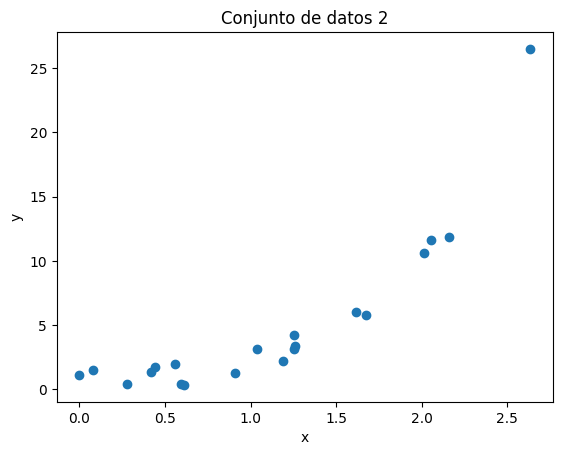

In [10]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

a_2 = 0.1  

def der_parcial_1_exp(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(np.exp(a_2 * x) for x in xs)
    c_0 = len(xs)
    c_ind = sum(y * np.exp(a_2 * x) for x, y in zip(xs, ys)) 
    return (c_1, c_0, c_ind)

def der_parcial_2_exp(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(x * np.exp(a_2 * x) for x in xs)
    c_0 = sum(np.exp(a_2 * x) for x in xs)
    c_ind = sum(y * x * np.exp(a_2 * x) for x, y in zip(xs, ys)) 
    return (c_1, c_0, c_ind)

def ajustar_min_cuadrados_exponencial(xs: list, ys: list) -> list[float]:
    gradientes = [der_parcial_1_exp, der_parcial_2_exp]

    return ajustar_min_cuadrados(xs, ys, gradientes)

def exponencial(x: float, pars: tuple[float]) -> float:
    a_1, a_2 = pars
    return a_1 * np.exp(a_2 * x)


[01-11 14:27:17][INFO] Se ajustarán 2 parámetros.
[01-11 14:27:17][INFO] 
[[ 22.38916315  20.         118.73591393]
 [  0.          -0.71576145  89.8495933 ]]
[np.float64(117.43795601999452), np.float64(-125.5300821683149)]


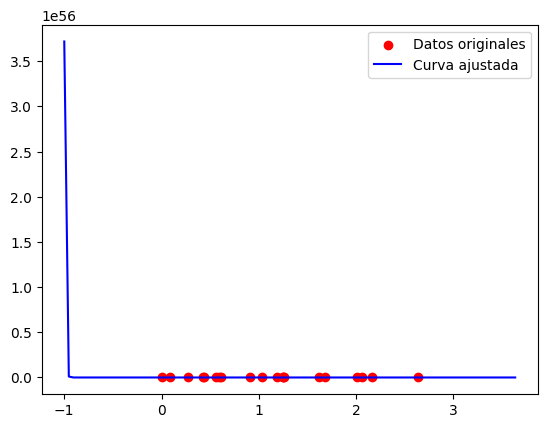

In [30]:
params = ajustar_min_cuadrados_exponencial(xs2, ys2)
print(params)

x_range = np.linspace(min(xs2) - 1, max(xs2) + 1, 100)
y_range = [exponencial(x, params) for x in x_range]
plt.scatter(xs2, ys2, color='red', label='Datos originales')
plt.plot(x_range, y_range, color='blue', label='Curva ajustada')
plt.legend()
plt.show()